## Generating code using bia-bob
[BIA Bob](https://github.com/haesleinhuepf/bia-bob) is a Jupyter-magic based assistant for interacting with data via code generation. We can initialize it to use the ScaDS.AI LLM server like this:

In [1]:
import os
from bia_bob import bob
bob.initialize(endpoint="https://llm.scads.ai/v1",
               api_key=os.environ.get('SCADSAI_API_KEY'), 
               model="meta-llama/Llama-3.3-70B-Instruct")

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
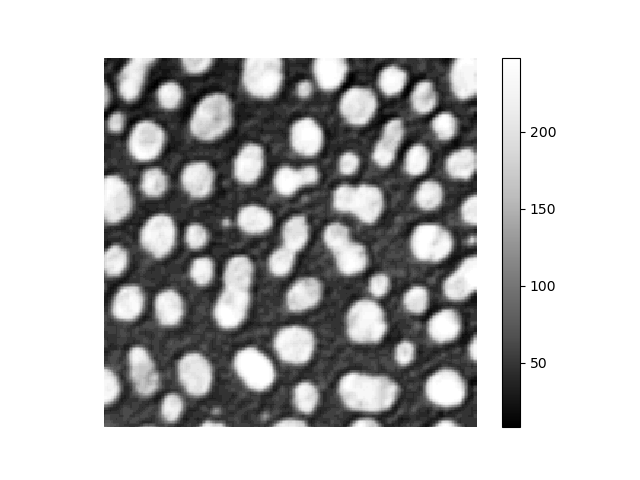
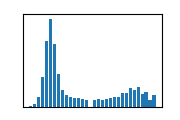

In [5]:
import skimage.io
import stackview

image = skimage.io.imread("blobs.tif")
stackview.insight(image)

In [9]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Visualize the result next to the original and 
also visualize an overlay of both images

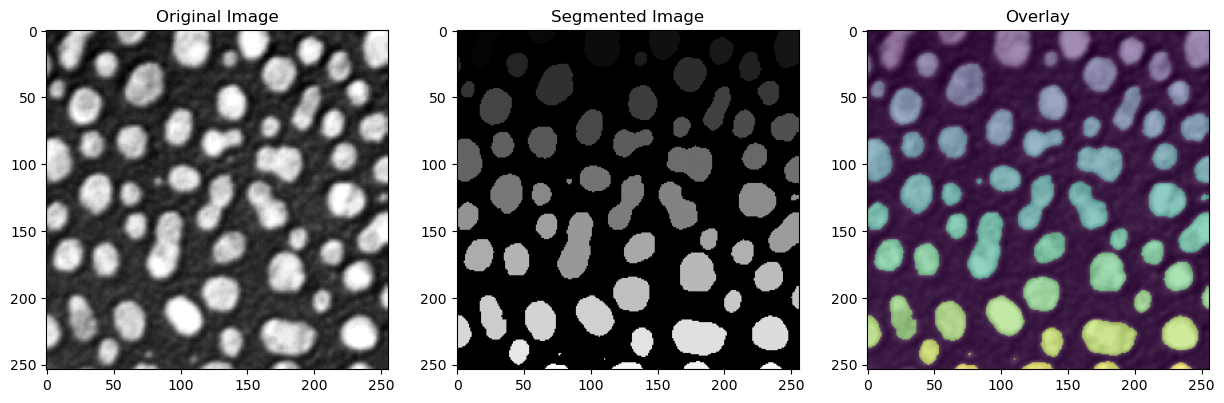

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label

# Load the image
new_image = imread("blobs.tif")

# Apply Otsu's thresholding
new_threshold = threshold_otsu(new_image)
new_binary_image = new_image > new_threshold

# Apply connected component labeling
new_labels = label(new_binary_image)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Visualize the original image
axs[0].imshow(new_image, cmap='gray')
axs[0].set_title('Original Image')

# Visualize the segmented image
axs[1].imshow(new_labels, cmap='gray')
axs[1].set_title('Segmented Image')

# Visualize an overlay of both images
axs[2].imshow(new_image, cmap='gray')
axs[2].imshow(new_labels, cmap='viridis', alpha=0.5)
axs[2].set_title('Overlay')

plt.show()

## Exercise
Ask bob to solve a task in another scientific domain.

In [13]:
%bob draw a plot of a ReLU Activation function. Keep it short.

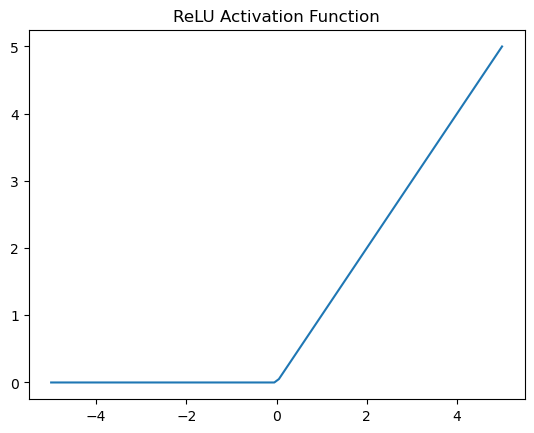

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-5, 5, 100)
y_values = np.maximum(x_values, 0)
plt.plot(x_values, y_values)
plt.title('ReLU Activation Function')
plt.show()